## Result Visualizations with Surrogate Explainers
### CHAPTER 02 - *Model Explainability Methods*

From **Applied Machine Learning Explainability Techniques** by [**Aditya Bhattacharya**](https://www.linkedin.com/in/aditya-bhattacharya-b59155b6/), published by **Packt**

### Objective

In this notebook, we will try to implement some of the concepts related to Feature Importance and Sensitivity Analysis part of the Influence based explainability methods discussed in Chapter 2 - Model Explainability Methods.

### Installing the modules

Install the following libraries in Google Colab or your local environment, if not already installed.

In [ ]:
!pip install --upgrade pandas numpy matplotlib seaborn scikit-learn xgboost skope-rules

### Loading the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")
np.random.seed(5)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import xgboost as xgb
import sklearn
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules
from dtreeviz.trees import dtreeviz
import graphviz

### About the data

**Adult Data Set - UCI Machine Learning Repository**

This dataset is also known as the *Census Income* dataset which is used to predict whether the income exceeds $50k/year based on census data. It is a multivariate dataset used for classification based problems containing 14 different features. More details about this data can be found at - [https://archive.ics.uci.edu/ml/datasets/adult](https://archive.ics.uci.edu/ml/datasets/adult)

### Loading the data

In [2]:
data  = pd.read_csv('Datasets/adult_census.csv', header=None)
data.columns = ['Age','Workclass','fnlwgt','Education','Education-Num','Marital Status','Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss','Hours per week','Country','AnnualIncome'].copy()
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,AnnualIncome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(32561, 15)

In [4]:
features = data.iloc[:,:-1]
labels = data.iloc[:,-1]
labels.value_counts()

 <=50K    24720
 >50K      7841
Name: AnnualIncome, dtype: int64

In [5]:
labels = labels.apply(lambda x: 1 if x == ' >50K' else 0)

### Data Preprocessing

In [6]:
features = pd.get_dummies(features)
features.head()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
labels.value_counts()

0    24720
1     7841
Name: AnnualIncome, dtype: int64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=30)

### Training a model

In [9]:
classifier = xgb.XGBClassifier(n_estimators=400, max_depth=10, base_score=0.5, objective='binary:logistic', random_state=30)
classifier.fit(x_train, y_train)

[23:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=30,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
classifier.score(x_test, y_test)

0.8615077537233226

So, we have trained an XGBoost Classifier which is not inherently interpretable. Now, we will use certain Surrogate Explainers to explain black-box models. Let's start with RuleFit model. We will use the Skope-Rules framework: https://github.com/scikit-learn-contrib/skope-rules for this purpose.

### RuleFit Surrogate Explainer

In [11]:
skope_rules_clf = SkopeRules(feature_names=list(x_train.columns), random_state=100, 
                             n_estimators=4, max_depth=10, max_depth_duplication=8,
                             recall_min=0.03, precision_min=0.03, max_samples=0.85, bootstrap=True,
                             verbose=1, n_jobs=4)
skope_rules_clf.fit(x_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


SkopeRules(bootstrap=True,
           feature_names=['Age', 'fnlwgt', 'Education-Num', 'Capital Gain',
                          'Capital Loss', 'Hours per week', 'Workclass_ ?',
                          'Workclass_ Federal-gov', 'Workclass_ Local-gov',
                          'Workclass_ Never-worked', 'Workclass_ Private',
                          'Workclass_ Self-emp-inc',
                          'Workclass_ Self-emp-not-inc', 'Workclass_ State-gov',
                          'Workclass_ Without-pay', 'Education_ 10th',
                          'Education_ 11...
                          'Education_ 7th-8th', 'Education_ 9th',
                          'Education_ Assoc-acdm', 'Education_ Assoc-voc',
                          'Education_ Bachelors', 'Education_ Doctorate',
                          'Education_ HS-grad', 'Education_ Masters',
                          'Education_ Preschool', 'Education_ Prof-school', ...],
           max_depth=10, max_depth_duplication=8, max_

In [12]:
for rules in skope_rules_clf.rules_[:5]:
    print(rules)
    print("\n")

('Age <= 61.5 and Age > 36.5 and Workclass_ Self-emp-not-inc <= 0.5 and Education-Num > 12.5 and Capital Gain <= 3120.0 and Marital Status_ Married-civ-spouse > 0.5 and Capital Loss <= 1794.0 and Occupation_ Other-service <= 0.5 and Hours per week > 32.5', (0.7257663628831814, 0.1626740947075209, 2))


('Age > 25.5 and Education-Num <= 14.5 and Education-Num > 12.5 and Capital Gain <= 3120.0 and Marital Status_ Married-civ-spouse > 0.5 and Capital Loss <= 1794.0 and Occupation_ Exec-managerial <= 0.5 and Occupation_ Farming-fishing <= 0.5 and Hours per week > 31.0', (0.6408268733850129, 0.13865076407007082, 2))


('Education-Num > 12.5 and Capital Gain > 5095.5 and Marital Status_ Married-civ-spouse > 0.5', (1.0, 0.08729861371300113, 2))


('Education-Num > 12.5 and Capital Gain > 5095.5 and Marital Status_ Married-civ-spouse > 0.5 and Occupation_ ? <= 0.5 and Occupation_ Farming-fishing <= 0.5', (0.9936170212765958, 0.08702944465150951, 2))


('Age <= 85.0 and Education-Num > 12.5 and

As we can observe from the above steps, for the Surrogate Explainer, we are fitting a separate model and not making use of the XGBoost model. Although the XGBoost model is more accurate, it is not interpretable. So, we try to use a less complex and interpretable model, like the RuleFit model, and can provide explainability to even complex models.

### Decision Tree Surrogate Explainer

In [13]:
clf = DecisionTreeClassifier(random_state=1234, max_depth=3)
clf.fit(features, labels)

DecisionTreeClassifier(max_depth=3, random_state=1234)

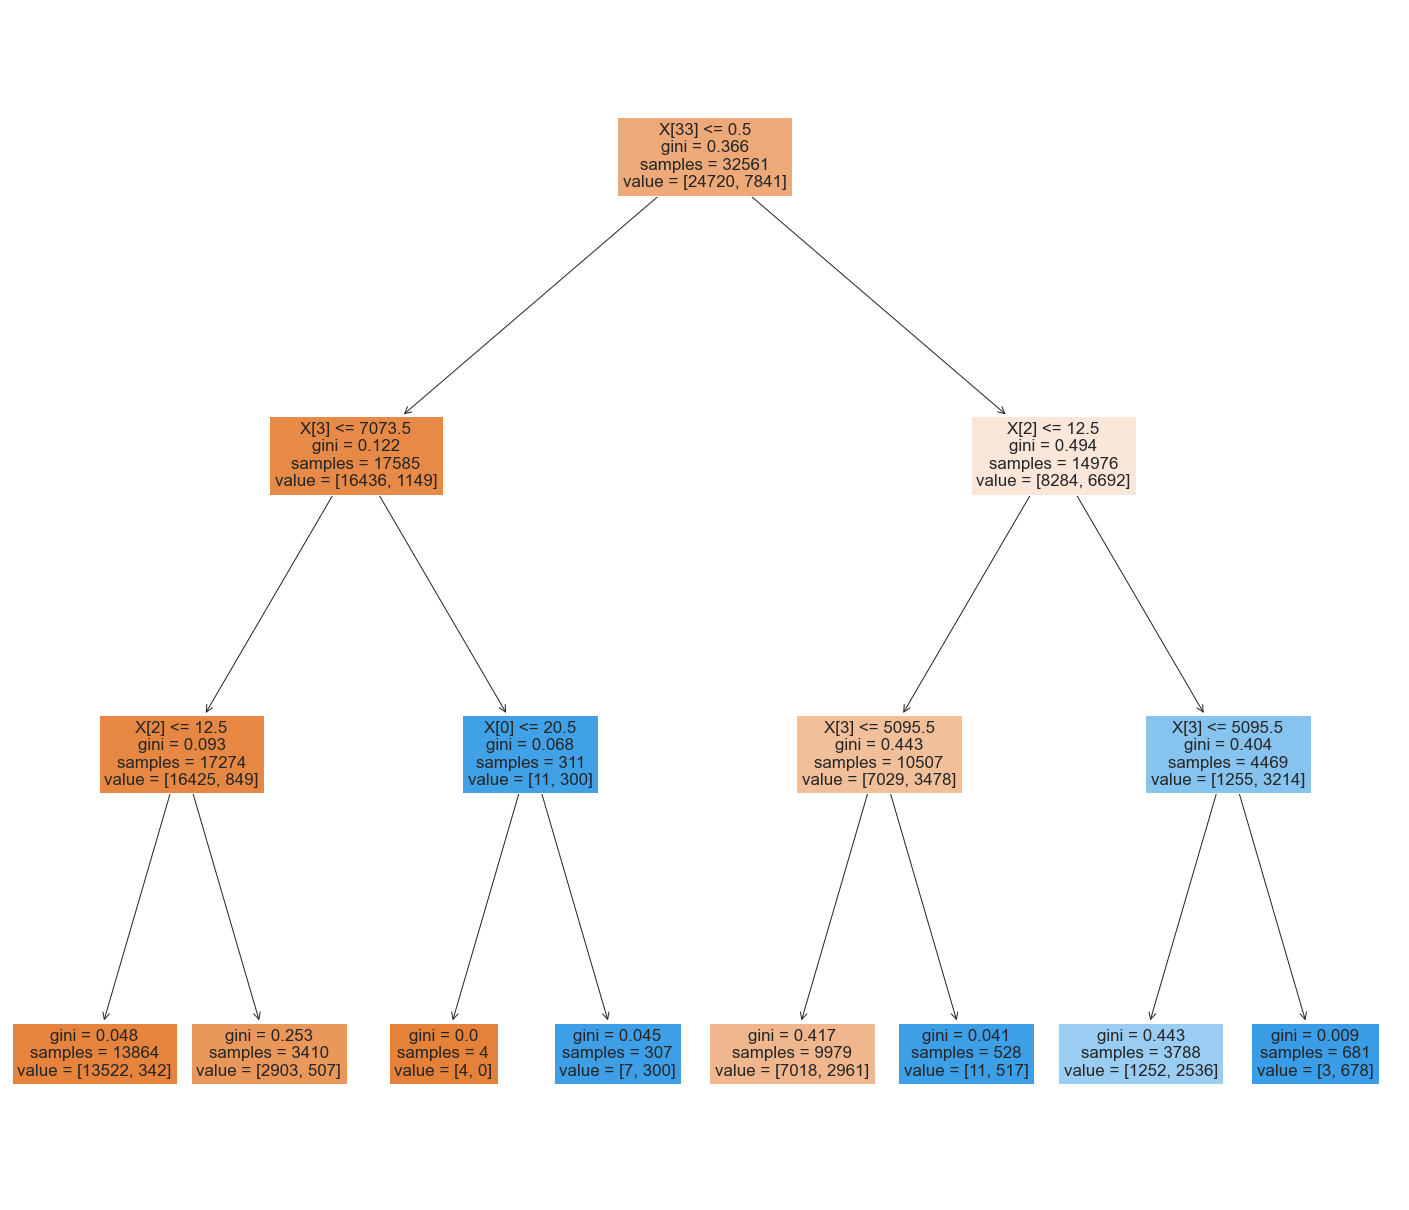

In [25]:
# Visualizing Decision Trees
fig, axes = plt.subplots(figsize=(25,22))
tree.plot_tree(clf, filled = True)
plt.show()

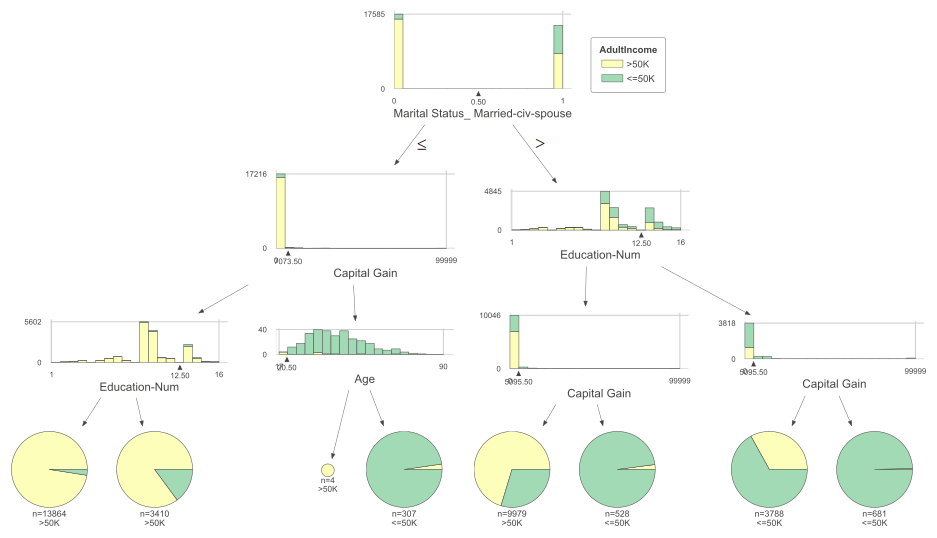

In [26]:
viz = dtreeviz(clf, features, labels,
                target_name="AdultIncome",
                feature_names=features.columns,
                class_names=['>50K','<=50K'],
                scale=1.30)

viz

### Final Thoughts

The methods explored in this notebook, are all model agnostic approaches for explaining black-box models. These methods are very simple to execute and quite human friendly depending on the Surrogate Explainer methods used. Also, the result visualizations doesn't need any complicated level of understanding, so very effective for business stakeholders. But the major drawback is that these methods doesn't include the information learnt from the actual model. The actual model might learn important information and might unravel certain critical features which might not be picked up the Surrogate models. Overall, this is one of the most common methods for explaining black-box models, mainly because of its simplicity. Try out this method for regression based problems.

### Reference

1. UCI Machine Learning Repository -https://archive.ics.uci.edu/ml/datasets/adult
3. Some of the utility functions and code are taken from the GitHub Repository of the author - Aditya Bhattacharya https://github.com/adib0073